# Signal processing steps involve detecting and extracting signal packets from OcuSync 1, OcuSync 2, or OcuSync 3, followed by feature extraction and pattern identification & matching.

# Remember one thing: in this code, I’m taking input from the user. If you press 1, 2, or 3, you will get detailed analysis of OcuSync 1, OcuSync 2, or OcuSync 3 data — based on the number you press when it asks for input.


File: Ocusync3_40msps.dat
Number of Samples: 4000000
Duration: 0.100000 seconds


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


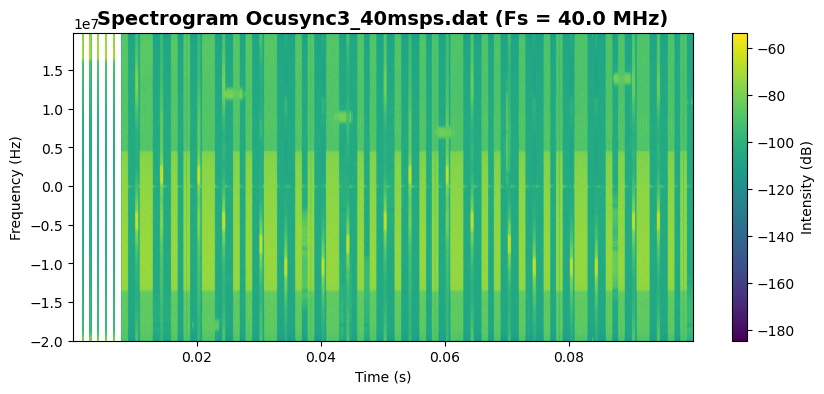

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrogram(file_path, sampling_rate):
    """
    Reads a binary signal file, computes its spectrogram, and plots it.

    Parameters:
    file_path (str): Path to the .dat file containing complex64 signal data.
    sampling_rate (float): Sampling rate in Hz.
    """
    # Read the data
    with open(file_path, "rb") as f:
        signal_data = np.fromfile(f, dtype=np.complex64)

    # Compute signal duration
    num_samples = len(signal_data)
    duration = num_samples / sampling_rate  # Duration in seconds

    print(f"\nFile: {file_path.split('/')[-1]}")
    print(f"Number of Samples: {num_samples}")
    print(f"Duration: {duration:.6f} seconds")

    # Close previous plots before plotting a new one
    plt.close("all")

    # Compute and plot spectrogram
    plt.figure(figsize=(10, 4))  # Create a new figure
    plt.specgram(signal_data, Fs=sampling_rate)
    plt.title(f'Spectrogram {file_path.split("/")[-1]} (Fs = {sampling_rate/1e6} MHz)', fontsize=14, fontweight='bold')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Intensity (dB)")
    plt.show()

# Mapping file indices to file paths and sampling rates
sample_files = {
    "1": ("/home/sandeep/Ocusync1_40msps.dat", 40e6),
    "2": ("/home/sandeep/Ocusync2_50msps.dat", 50e6),
    "3": ("/home/sandeep/Ocusync3_40msps.dat", 40e6),
}

while True:
    file_number = input("\nEnter file number (1, 2, 3) to plot spectrogram, or type 'exit' to quit: ").strip()

    if file_number.lower() == "exit":
        plt.close("all")  # Close all plots before exiting
        break

    if file_number in sample_files:
        file_path, sampling_rate = sample_files[file_number]
        plot_spectrogram(file_path, sampling_rate)
    else:
        print("Invalid selection. Please enter 1, 2, or 3.")


# POWER SPECTRAL DENSITY PLOT FOR OCUSYNC1, OCUSYNC2 AND OCUSYNC3 DATA

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

def compute_psd(signal_data, fs=sampling_rate, nfft_welch=2048):
    """
    Computes and plots the Power Spectral Density (PSD) using Welch's method.
    
    Parameters:
    signal_data (numpy array): Complex signal data.
    fs (float): Sampling frequency in Hz.
    nfft_welch (int): Number of FFT points for Welch's method.
    """
    if len(signal_data) < nfft_welch:
        print("Insufficient data length for Welch's method")
        return
    
    window = hamming(len(signal_data))
    data_windowed = signal_data * window
    
    f, Pxx_den = welch(data_windowed, fs, nperseg=nfft_welch, return_onesided=False)
    Pxx_den_shifted = np.fft.fftshift(Pxx_den)
    f_shifted = np.fft.fftshift(f)
    
    mean_psd_value = np.mean(Pxx_den_shifted)
    print(f"Mean PSD Value: {mean_psd_value:.2e} V^2/Hz")
    '''
    plt.figure(figsize=(10, 4))
    plt.semilogy(f_shifted / 1e6, Pxx_den_shifted)
    plt.axhline(1.1 * mean_psd_value, color='r', linestyle='--', label="Mean PSD")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("PSD [V**2/Hz]")
    plt.title("Power Spectral Density (PSD)")
    plt.legend()
    plt.show()
    '''
file_number = input("\nEnter file number (1, 2, 3) to plot PSD, or type 'exit' to quit: ").strip()

if file_number.lower() == "exit":
    plt.close("all")  # Close all plots before exiting
else:
    if file_number in sample_files:
        file_path, sampling_rate = sample_files[file_number]

        # Read the signal data
        with open(file_path, "rb") as f:
            signal_data = np.fromfile(f, dtype=np.complex64)

        plt.close("all")  # Close previous plot before opening a new one
        compute_psd(signal_data, sampling_rate)  # Compute and plot PSD for the selected file
    else:
        print("Invalid selection. Please enter 1, 2, or 3.")


/tmp/ipykernel_47666/962520164.py:18: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(len(signal_data))


Mean PSD Value: 4.70e-09 V^2/Hz


# FREQUENCY SPECTRUM PLOT FOR OCUSYNC1, OCUSYNC2 & OCUSYNC3 DATA

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_spectrum(signal_data, sampling_rate):
    """
    Computes and plots the frequency spectrum of the input signal using FFT.
    
    Parameters:
    - signal_data: Input signal data (numpy array)
    - sampling_rate: The sampling rate of the signal (Hz)
    """
    n = len(signal_data)  # Number of samples
    fft_data = np.fft.fft(signal_data)

    # Shift the zero frequency component to the center
    fft_data_shifted = np.fft.fftshift(fft_data)

    # Create the frequency axis
    frequencies = np.fft.fftshift(np.fft.fftfreq(n, 1 / sampling_rate))
'''
    # Plot the magnitude of the shifted FFT
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies / 1e6, np.abs(fft_data_shifted))  # Convert Hz to MHz
    plt.title('Frequency Spectrum of the Signal')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()
'''
file_number = input("\nEnter file number (1, 2, 3) to analyze, or type 'exit' to quit: ").strip()

if file_number.lower() == "exit":
    plt.close("all")  # Close all plots before exiting
else:
    if file_number in sample_files:
        file_path, sampling_rate = sample_files[file_number]

        # Read the signal data
        with open(file_path, "rb") as f:
            signal_data = np.fromfile(f, dtype=np.complex64)

        plt.close("all")  # Close previous plots before opening new ones

        

        # Plot Frequency Spectrum
        plot_frequency_spectrum(signal_data, sampling_rate)
    else:
        print("Invalid selection. Please enter 1, 2, or 3.")


# ENERGY BASED ALGORITHM TO DETECT AND EXTRACT SIGNAL PACKETS FROM OCUSYNC1, OCUSYNC2 & OCUSYNC3

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def bandpass_filter(data, sampling_rate, low_cutoff, high_cutoff, order=4):
    """
    Apply a bandpass filter to isolate the desired frequency range.
    """
    nyquist = sampling_rate / 2.0
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def detect_packets_energy(data, sampling_rate, window_ms, threshold_factor):
    """
    Detect signal packets based on energy accumulation.
    """
    window_samples = int((window_ms / 1000) * sampling_rate)
    energy_profile = np.convolve(np.abs(data)**2, np.ones(window_samples), mode='same')
    
    noise_level = np.mean(energy_profile)  # Baseline noise level
    threshold = threshold_factor * noise_level

    detected = energy_profile > threshold
    packets = []
    start = None

    for i, is_high in enumerate(detected):
        if is_high and start is None:
            start = i
        elif not is_high and start is not None:
            packets.append((start, i))
            start = None

    if start is not None:
        packets.append((start, len(detected)))

    return packets, energy_profile, threshold

# Define cutoff frequencies only (no repetition of sample_files)
cutoff_frequencies = {
    "1": (4.5e6, 19.9e6),
    "2": (6e6, 24e6),
    "3": (5e6, 14e6)
}

selection = input("\nPress 1 for index 1, 2 for index 2, or 3 for index 3: ").strip()

if selection in sample_files:
    file_path, sampling_rate = sample_files[selection]  # Using sample_files from previous cell
    low_cutoff, high_cutoff = cutoff_frequencies[selection]

    # Read the signal data
    with open(file_path, "rb") as f:
        signal_data = np.fromfile(f, dtype=np.complex64)

    # Step 1: Apply Bandpass Filter
    filtered_data = bandpass_filter(signal_data, sampling_rate, low_cutoff, high_cutoff)

    # Step 2: Detect Signal Packets
    window_ms = 0.108  # Window size in milliseconds
    threshold_factor = 0.9  # Threshold multiplier
    packets, energy_profile, threshold = detect_packets_energy(filtered_data, sampling_rate, window_ms, threshold_factor)

    # Step 3: Filter Out Short Packets
    valid_duration_threshold = 640e-6  # 600 microseconds
    valid_packets = [
        (start_idx, end_idx) for start_idx, end_idx in packets
        if (end_idx - start_idx) / sampling_rate >= valid_duration_threshold
    ]

    # Step 4: Plot Energy Profile
    '''
    plt.figure(figsize=(12, 6))
    plt.plot(energy_profile, label="Energy Profile", color="blue")
    plt.axhline(y=threshold, color="red", linestyle="--", label="Threshold")
    plt.title(f"Energy Profile with Detected Signal Packets (Index {selection})")
    plt.xlabel("Sample Index")
    plt.ylabel("Energy")
    plt.legend()
    plt.grid()
    plt.show()
    '''
    # Step 5: Plot Spectrograms for Detected Packets
    print(f"Number of detected packets: {len(valid_packets)}")
    for idx, (start_idx, end_idx) in enumerate(valid_packets, start=1):
        start_time = start_idx / sampling_rate
        end_time = end_idx / sampling_rate
        print(f"Packet {idx}: Start Time = {start_time:.6f} s, End Time = {end_time:.6f} s, Duration = {(end_time - start_time) * 1000:.3f} ms")

        packet_data = signal_data[start_idx:end_idx]
        '''
        plt.figure(figsize=(10, 4))
        plt.specgram(packet_data, NFFT=256, Fs=sampling_rate, noverlap=128, cmap='viridis', scale='dB')
        plt.title(f"Spectrogram of Detected Packet {idx}")
        plt.xlabel("Time [s]")
        plt.ylabel("Frequency [Hz]")
        plt.colorbar(label="Power/Frequency [dB]")
        plt.show()
        '''
else:
    print("Invalid selection. Please enter 1, 2, or 3.")


Number of detected packets: 28
Packet 1: Start Time = 0.007767 s, End Time = 0.008875 s, Duration = 1.108 ms
Packet 2: Start Time = 0.010752 s, End Time = 0.012875 s, Duration = 2.124 ms
Packet 3: Start Time = 0.015768 s, End Time = 0.016875 s, Duration = 1.107 ms
Packet 4: Start Time = 0.017768 s, End Time = 0.018874 s, Duration = 1.106 ms
Packet 5: Start Time = 0.020757 s, End Time = 0.022873 s, Duration = 2.116 ms
Packet 6: Start Time = 0.025768 s, End Time = 0.026874 s, Duration = 1.106 ms
Packet 7: Start Time = 0.027769 s, End Time = 0.028872 s, Duration = 1.103 ms
Packet 8: Start Time = 0.030751 s, End Time = 0.032871 s, Duration = 2.121 ms
Packet 9: Start Time = 0.035772 s, End Time = 0.036875 s, Duration = 1.103 ms
Packet 10: Start Time = 0.037769 s, End Time = 0.038871 s, Duration = 1.102 ms
Packet 11: Start Time = 0.040755 s, End Time = 0.042872 s, Duration = 2.116 ms
Packet 12: Start Time = 0.045773 s, End Time = 0.046869 s, Duration = 1.095 ms
Packet 13: Start Time = 0.0477

# ESTIMATE OFFSET FREQUENCY AND IT'S CORRECTION

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, hamming

class DroneSignalProcessor:
    def __init__(self, debug=True):
        self.debug = debug

    @staticmethod
    def fshift(y, offset, Fs):
        """Shift the frequency of the signal."""
        print(f"Signal Length: {len(y)}, Offset: {offset} Hz, Sampling Rate: {Fs} Hz")
        x = np.linspace(0.0, len(y) / Fs, len(y))
        return y * np.exp(x * 2j * np.pi * offset)  # Apply frequency shift correction

    def consecutive(self, data, stepsize=1):
        """Group consecutive elements based on a step size."""
        return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)

    def estimate_offset(self, y, Fs, packet_type="droneid", selection="1"):
        """Estimate the frequency offset in the signal."""
        nfft_welch = 1024  # FFT size for PSD calculation

        if len(y) < nfft_welch:
            return None, False

        # Apply Hamming window
        window = hamming(len(y))
        y = y * window

        # Compute Power Spectral Density (PSD)
        f, Pxx_den = welch(y, Fs, nfft=nfft_welch, return_onesided=False)
        Pxx_den = np.fft.fftshift(Pxx_den)
        f = np.fft.fftshift(f)

        # Add a fake DC carrier to distinguish signal components
        Pxx_den[nfft_welch // 2 - 10:nfft_welch // 2 + 10] = 1.1 * Pxx_den.mean()

        # Identify candidate frequency bands
        candidate_bands = self.consecutive(np.where(Pxx_den > 0.7 * Pxx_den.mean())[0])

        band_found = False
        offset = 0.0

        for band in candidate_bands:
            start = band[0] - nfft_welch / 2
            end = band[-1] - nfft_welch / 2
            bw = (end - start) * (Fs / nfft_welch)
            fend = start * Fs / nfft_welch
            fstart = end * Fs / nfft_welch

            if self.debug:
                print(f"Candidate band fstart: {fstart:.2f}, fend: {fend:.2f}, bw: {bw / 1e6:.2f} MHz")

            if selection == "1" and -19.99e6 <= fstart - 0.5 * bw <= -4.5e6:
                offset = fstart - 0.5 * bw
                band_found = True
                break
            elif selection == "2" and -24e6 <= fstart - 0.5 * bw <= -6e6:
                offset = fstart - 0.5 * bw
                band_found = True
                break
            elif selection == "3" and -13.5e6 <= fstart - 0.5 * bw <= 4.5e6:
                offset = fstart - 0.5 * bw
                band_found = True
                break

        if self.debug:
            print(f"Offset found: {offset / 1000:.2f} kHz")
        return offset, band_found


# Define cutoff frequencies for different selections
cutoff_frequencies = {
    "1": (4.5e6, 19.99e6),
    "2": (6e6, 24e6),
    "3": (5e6, 14e6)
}

# === Simulated definitions for the demo (remove/replace with your actual values) ===
# sample_files and valid_packets should be defined before this cell
# For example:
# sample_files = {
#     "1": ("/path/to/file1.dat", 50e6),
#     "2": ("/path/to/file2.dat", 50e6),
#     "3": ("/path/to/file3.dat", 50e6)
# }
# valid_packets = [(start_idx1, end_idx1), (start_idx2, end_idx2), ...]
# ===================================================================================

# User input for selection
selection = input("\nPress 1 for index 1, 2 for index 2, or 3 for index 3: ").strip()

# List to store corrected packets for later use
corrected_packets = []

# Check if selection exists
if selection in sample_files:
    file_path, sampling_rate = sample_files[selection]
    low_cutoff, high_cutoff = cutoff_frequencies[selection]

    # Read the signal data
    with open(file_path, "rb") as f:
        signal_data = np.fromfile(f, dtype=np.complex64)

    # Process each detected packet
    processor = DroneSignalProcessor(debug=False)
    for idx, (start_idx, end_idx) in enumerate(valid_packets, start=1):
        start_time = start_idx / sampling_rate
        end_time = end_idx / sampling_rate
        duration_ms = (end_time - start_time) * 1000

        #print(f"Packet {idx}: Start Time = {start_time:.6f} s, End Time = {end_time:.6f} s, Duration = {duration_ms:.3f} ms")

        # Extract the packet
        packet_data = signal_data[start_idx:end_idx]

        # Estimate frequency offset
        offset, band_found = processor.estimate_offset(packet_data, sampling_rate, packet_type="droneid", selection=selection)

        if band_found:
            print(f"Packet {idx}: Estimated Frequency Offset = {offset / 1000:.2f} kHz")

            # Apply frequency offset correction
            corrected_packet = DroneSignalProcessor.fshift(packet_data, -offset, sampling_rate)

            # Store for later use
            corrected_packets.append(corrected_packet)

        else:
            print(f"Packet {idx}: No suitable band found for offset correction.")
else:
    print("Invalid selection. Please enter 1, 2, or 3.")


/tmp/ipykernel_47666/2621232091.py:28: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(len(y))


Packet 1: Estimated Frequency Offset = -4550.78 kHz
Signal Length: 44328, Offset: 4550781.25 Hz, Sampling Rate: 40000000.0 Hz
Packet 2: Estimated Frequency Offset = -4531.25 kHz
Signal Length: 84954, Offset: 4531250.0 Hz, Sampling Rate: 40000000.0 Hz
Packet 3: Estimated Frequency Offset = -4550.78 kHz
Signal Length: 44263, Offset: 4550781.25 Hz, Sampling Rate: 40000000.0 Hz
Packet 4: Estimated Frequency Offset = -4550.78 kHz
Signal Length: 44243, Offset: 4550781.25 Hz, Sampling Rate: 40000000.0 Hz
Packet 5: Estimated Frequency Offset = -4550.78 kHz
Signal Length: 84651, Offset: 4550781.25 Hz, Sampling Rate: 40000000.0 Hz
Packet 6: Estimated Frequency Offset = -4550.78 kHz
Signal Length: 44254, Offset: 4550781.25 Hz, Sampling Rate: 40000000.0 Hz
Packet 7: Estimated Frequency Offset = -4531.25 kHz
Signal Length: 44120, Offset: 4531250.0 Hz, Sampling Rate: 40000000.0 Hz
Packet 8: Estimated Frequency Offset = -4570.31 kHz
Signal Length: 84825, Offset: 4570312.5 Hz, Sampling Rate: 40000000.

# POWER SPECTRAL DENSITY PLOT AFTER OFFSET CORRECTION

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

def plot_psd_from_corrected_packets(corrected_packets, sampling_rate, nfft_welch=1024):
    """
    Plots the Power Spectral Density (PSD) of already frequency-corrected packets.

    Parameters:
        corrected_packets (list of np.ndarray): List of corrected signal packets.
        sampling_rate (float): Sampling frequency in Hz.
        nfft_welch (int): Number of FFT points for Welch’s method (default: 1024).
    """
    for idx, corrected_packet in enumerate(corrected_packets, start=1):
        signal_len = len(corrected_packet)

        if signal_len < nfft_welch:
            print(f"Packet {idx}: Skipped (too short for Welch's method)")
            continue

        # Apply Hamming window
        window = hamming(signal_len)
        data_windowed = corrected_packet * window

        # Compute PSD using Welch's method
        f, Pxx_den = welch(data_windowed, sampling_rate, nperseg=nfft_welch, return_onesided=False)

        # Shift for symmetrical spectrum
        f_shifted = np.fft.fftshift(f)
        Pxx_den_shifted = np.fft.fftshift(Pxx_den)

        # Mean PSD
        mean_psd_value = np.mean(Pxx_den_shifted)
        print(f"Mean PSD Value for Packet {idx}: {mean_psd_value:.2e} V²/Hz")
        '''
        # Plot
        plt.figure(figsize=(10, 4))
        plt.semilogy(f_shifted / 1e6, Pxx_den_shifted)
        plt.axhline(1.1 * mean_psd_value, color='r', linestyle='--', label="1.1 × Mean PSD")
        plt.xlabel("Frequency [MHz]")
        plt.ylabel("PSD [V²/Hz]")
        plt.title(f"Power Spectral Density (Corrected Packet {idx})")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()
        '''
plot_psd_from_corrected_packets(corrected_packets, sampling_rate)



Mean PSD Value for Packet 1: 1.11e-08 V²/Hz
Mean PSD Value for Packet 2: 1.10e-08 V²/Hz
Mean PSD Value for Packet 3: 1.08e-08 V²/Hz
Mean PSD Value for Packet 4: 1.08e-08 V²/Hz
Mean PSD Value for Packet 5: 1.02e-08 V²/Hz
Mean PSD Value for Packet 6: 1.02e-08 V²/Hz
Mean PSD Value for Packet 7: 1.02e-08 V²/Hz
Mean PSD Value for Packet 8: 1.00e-08 V²/Hz
Mean PSD Value for Packet 9: 9.86e-09 V²/Hz
Mean PSD Value for Packet 10: 9.85e-09 V²/Hz
Mean PSD Value for Packet 11: 9.37e-09 V²/Hz
Mean PSD Value for Packet 12: 9.46e-09 V²/Hz
Mean PSD Value for Packet 13: 9.45e-09 V²/Hz
Mean PSD Value for Packet 14: 9.28e-09 V²/Hz
Mean PSD Value for Packet 15: 9.07e-09 V²/Hz
Mean PSD Value for Packet 16: 9.08e-09 V²/Hz
Mean PSD Value for Packet 17: 8.67e-09 V²/Hz
Mean PSD Value for Packet 18: 8.83e-09 V²/Hz
Mean PSD Value for Packet 19: 8.83e-09 V²/Hz
Mean PSD Value for Packet 20: 8.80e-09 V²/Hz
Mean PSD Value for Packet 21: 8.78e-09 V²/Hz
Mean PSD Value for Packet 22: 8.80e-09 V²/Hz
Mean PSD Value for 

/tmp/ipykernel_47666/2124601151.py:22: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(signal_len)


In [99]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_spectrum(corrected_packet, idx, Fs, fft_size=2048):
    """Compute and plot the frequency spectrum of a corrected packet using a specified FFT size."""
    spectrum = np.fft.fftshift(np.abs(np.fft.fft(corrected_packet, n=fft_size)))
    freq_axis = np.fft.fftshift(np.fft.fftfreq(fft_size, d=1/Fs))
    
    # Find peak frequency in kHz
    peak_freq = freq_axis[np.argmax(spectrum)] / 1e3
    '''
    plt.figure(figsize=(10, 4))
    plt.plot(freq_axis / 1e6, spectrum)
    plt.axvline(x=-10, color='red', linestyle='--', linewidth=1, label='-10 MHz')
    plt.axvline(x=10, color='red', linestyle='--', linewidth=1, label='10 MHz')
    plt.title(f"Frequency Spectrum of Corrected Packet {idx} (Peak: {peak_freq:.2f} kHz)")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.tight_layout()
    plt.show()
    '''
    print(f"Packet {idx}: Peak Frequency = {peak_freq:.2f} kHz")

def plot_spectra_from_corrected_packets(corrected_packets, sampling_rate):
    """Plots frequency spectra for all already corrected packets."""
    for idx, packet in enumerate(corrected_packets, start=1):
        plot_frequency_spectrum(packet, idx, sampling_rate)

# --- Call the function directly using your stored corrected_packets list ---
plot_spectra_from_corrected_packets(corrected_packets, sampling_rate)


Packet 1: Peak Frequency = -1621.09 kHz
Packet 2: Peak Frequency = -4238.28 kHz
Packet 3: Peak Frequency = -1308.59 kHz
Packet 4: Peak Frequency = -3359.38 kHz
Packet 5: Peak Frequency = -1855.47 kHz
Packet 6: Peak Frequency = -3671.88 kHz
Packet 7: Peak Frequency = -1640.62 kHz
Packet 8: Peak Frequency = 3378.91 kHz
Packet 9: Peak Frequency = -1855.47 kHz
Packet 10: Peak Frequency = -1542.97 kHz
Packet 11: Peak Frequency = -2460.94 kHz
Packet 12: Peak Frequency = -1523.44 kHz
Packet 13: Peak Frequency = -1542.97 kHz
Packet 14: Peak Frequency = -1210.94 kHz
Packet 15: Peak Frequency = -1542.97 kHz
Packet 16: Peak Frequency = -1523.44 kHz
Packet 17: Peak Frequency = -1601.56 kHz
Packet 18: Peak Frequency = -7636.72 kHz
Packet 19: Peak Frequency = -1210.94 kHz
Packet 20: Peak Frequency = -1210.94 kHz
Packet 21: Peak Frequency = -1445.31 kHz
Packet 22: Peak Frequency = -1464.84 kHz
Packet 23: Peak Frequency = -2148.44 kHz
Packet 24: Peak Frequency = -1210.94 kHz
Packet 25: Peak Frequency 

# APPLY DFT LOW PASS FILTER 

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, filtfilt, welch, hamming

# Function for DFT-based filtering
def dft_filter(signal: np.ndarray, cutoff: float, sampling_rate: float):
    """
    Apply a DFT-based low-pass filter to the signal.
    """
    dft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    filter_mask = np.abs(freqs) < cutoff
    dft_filtered = dft * filter_mask
    signal_filtered = np.fft.ifft(dft_filtered)
    return signal_filtered

# Prompt user for selection
selection = input("Press 1, 2, or 3 to select the band: ").strip()
if selection not in ["1", "2", "3"]:
    print("Invalid selection. Defaulting to 1.")
    selection = "1"

# Define cutoff frequency based on selection
if selection == "1":
    cutoff_freq = 7.5e6
elif selection in ["2", "3"]:
    cutoff_freq = 8.5e6

# Initialize list to store only the selected filtered packets
filtered_packets = []

# Use already corrected packets
for idx, corrected_packet in enumerate(corrected_packets, start=1):
    # Apply DFT-based filter
    filtered_packet = dft_filter(corrected_packet, cutoff_freq, sampling_rate)

    # Store the filtered packet
    filtered_packets.append(filtered_packet)
    '''
    # Plot spectrogram
    plt.figure(figsize=(12, 5))
    plt.specgram(filtered_packet, NFFT=256, Fs=sampling_rate, noverlap=128, scale='dB')
    plt.title(f"Spectrogram of Filtered Packet {idx} (Selection {selection})")
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label="Power/Frequency [dB]")
    plt.show()
    '''

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, filtfilt, welch, hamming

# Function for DFT-based filtering
def dft_filter(signal: np.ndarray, cutoff: float, sampling_rate: float):
    """
    Apply a DFT-based low-pass filter to the signal.
    """
    dft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    filter_mask = np.abs(freqs) < cutoff
    dft_filtered = dft * filter_mask
    signal_filtered = np.fft.ifft(dft_filtered)
    return signal_filtered

# Prompt user for selection
selection = input("Press 1, 2, or 3 to select the band: ").strip()
if selection not in ["1", "2", "3"]:
    print("Invalid selection. Defaulting to 1.")
    selection = "1"

# Define cutoff frequency and sampling rate based on selection
sampling_rate_mapping = {"1": 40e6, "2": 50e6, "3": 40e6}
cutoff_mapping = {"1": 7.5e6, "2": 8.5e6, "3": 8.5e6}

sampling_rate = sampling_rate_mapping[selection]
cutoff_freq = cutoff_mapping[selection]

# Initialize dictionary to store filtered packets with metadata
filtered_packet_storage = {}

# Initialize list to store only the selected filtered packets
filtered_packets = []

# Use already corrected packets
for idx, corrected_packet in enumerate(corrected_packets, start=1):
    # Apply DFT-based filter
    filtered_packet = dft_filter(corrected_packet, cutoff_freq, sampling_rate)

    # Store the filtered packet
    filtered_packets.append(filtered_packet)

# Save the filtered packets and cutoff frequency in dictionary
filtered_packet_storage[selection] = {
    "packets": filtered_packets,
    "cutoff_freq": cutoff_freq,
    "sampling_rate": sampling_rate
}

# Optional: print confirmation
print(f"Stored {len(filtered_packets)} filtered packets for selection {selection} with cutoff {cutoff_freq/1e6} MHz")


Stored 28 filtered packets for selection 3 with cutoff 8.5 MHz


# FREQUENCY SPECTRUM PLOT AFTER FILTERING

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

# Function to plot frequency spectrum using fftshift
def plot_frequency_spectrum(signal, sampling_rate, idx, fft_size=2048):
    """Computes and plots the frequency spectrum of the given signal using FFT shift."""
    spectrum = np.fft.fftshift(np.abs(np.fft.fft(signal, n=fft_size)))
    freq_axis = np.fft.fftshift(np.fft.fftfreq(fft_size, d=1/sampling_rate))
    '''
    plt.figure(figsize=(10, 4))
    plt.plot(freq_axis / 1e6, spectrum)  # Convert frequency to MHz
    plt.axvline(x=-10, color='red', linestyle='--', linewidth=1, label='-10 MHz')
    plt.axvline(x=10, color='red', linestyle='--', linewidth=1, label='10 MHz')
    plt.title(f"Frequency Spectrum of Filtered Packet {idx}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.show()
    '''
# Plot spectrum of already filtered packets
for idx, filtered_packet in enumerate(filtered_packets, start=1):
    plot_frequency_spectrum(filtered_packet, sampling_rate, idx)


# POWER SPECTRAL DENSITY PLOT AFTER FILTERING

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

# Parameters
nfft_welch = 1024  # Number of FFT points for Welch's method

def compute_and_plot_psd_from_filtered(filtered_packets, sampling_rate):
    """
    Computes and plots the Power Spectral Density (PSD) of already filtered packets.

    Parameters:
        filtered_packets (list): List of already filtered packets (complex baseband).
        sampling_rate (float): Sampling frequency in Hz.
    """
    for idx, packet in enumerate(filtered_packets, start=1):
        if len(packet) < nfft_welch:
            print(f"Packet {idx}: Insufficient data length for Welch's method")
            continue

        # Apply Hamming window
        window = hamming(len(packet))
        data_windowed = packet * window

        # Compute PSD using Welch's method
        f, Pxx_den = welch(data_windowed, sampling_rate, nperseg=nfft_welch, return_onesided=False)

        # Shift frequency and PSD for negative frequencies
        Pxx_den_shifted = np.fft.fftshift(Pxx_den)
        f_shifted = np.fft.fftshift(f)

        # Compute mean PSD value
        mean_psd_value = np.mean(Pxx_den_shifted)
        print(f"Mean PSD Value for Packet {idx}: {mean_psd_value:.2e} V^2/Hz")
        '''
        # Plot PSD
        plt.figure(figsize=(8, 3))
        plt.semilogy(f_shifted / 1e6, Pxx_den_shifted)  # Convert frequency to MHz
        plt.axhline(1.1 * mean_psd_value, color='r', linestyle='--', label="Mean PSD")
        plt.xlabel("Frequency [MHz]")
        plt.ylabel("PSD [V**2/Hz]")
        plt.title(f"Power Spectral Density (PSD) of Filtered Packet {idx}")
        plt.legend()
        plt.tight_layout()
        plt.show()
        '''
compute_and_plot_psd_from_filtered(filtered_packets, sampling_rate)


Mean PSD Value for Packet 1: 9.95e-09 V^2/Hz
Mean PSD Value for Packet 2: 9.84e-09 V^2/Hz
Mean PSD Value for Packet 3: 9.67e-09 V^2/Hz
Mean PSD Value for Packet 4: 9.71e-09 V^2/Hz
Mean PSD Value for Packet 5: 9.17e-09 V^2/Hz
Mean PSD Value for Packet 6: 9.09e-09 V^2/Hz
Mean PSD Value for Packet 7: 9.11e-09 V^2/Hz
Mean PSD Value for Packet 8: 8.97e-09 V^2/Hz
Mean PSD Value for Packet 9: 8.82e-09 V^2/Hz
Mean PSD Value for Packet 10: 8.82e-09 V^2/Hz
Mean PSD Value for Packet 11: 8.39e-09 V^2/Hz
Mean PSD Value for Packet 12: 8.45e-09 V^2/Hz
Mean PSD Value for Packet 13: 8.47e-09 V^2/Hz
Mean PSD Value for Packet 14: 8.31e-09 V^2/Hz
Mean PSD Value for Packet 15: 8.13e-09 V^2/Hz
Mean PSD Value for Packet 16: 8.16e-09 V^2/Hz
Mean PSD Value for Packet 17: 7.77e-09 V^2/Hz
Mean PSD Value for Packet 18: 7.90e-09 V^2/Hz
Mean PSD Value for Packet 19: 7.95e-09 V^2/Hz
Mean PSD Value for Packet 20: 7.87e-09 V^2/Hz
Mean PSD Value for Packet 21: 7.85e-09 V^2/Hz
Mean PSD Value for Packet 22: 7.90e-09 V^2/

/tmp/ipykernel_47666/123046325.py:22: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(len(packet))


# SNR CALCULATION AFTER FILTERING

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

def integrate_power(frequencies, psd, band):
    """Integrate power over a specified frequency band."""
    indices = (frequencies >= band[0]) & (frequencies <= band[1])
    return np.trapz(psd[indices], frequencies[indices])

def compute_snr_and_plot_psd_filtered(filtered_packet_storage, selection):
    """
    Computes the SNR and plots the PSD for pre-filtered packets from storage.

    Parameters:
    - filtered_packet_storage: Dictionary containing filtered packets, cutoff, and sampling rate for each selection.
    - selection: User-selected key from the storage dictionary ("1", "2", or "3").
    """
    if selection not in filtered_packet_storage:
        print(f"No filtered packets found for selection {selection}.")
        return

    # Load stored packets, cutoff freq, and sampling rate
    stored = filtered_packet_storage[selection]
    filtered_packets = stored["packets"]
    cutoff_frequency = stored["cutoff_freq"]
    sampling_rate = stored["sampling_rate"]

    # Parameters
    nfft_welch = 2048

    # Define frequency bands
    signal_band = (-cutoff_frequency, cutoff_frequency)
    noise_band_lower = (-sampling_rate / 2, -cutoff_frequency)
    noise_band_upper = (cutoff_frequency, sampling_rate / 2)

    for idx, filtered_packet in enumerate(filtered_packets, start=1):
        # Ensure sufficient data length for Welch's method
        if len(filtered_packet) < nfft_welch:
            print(f"Packet {idx}: Insufficient data length for Welch's method.")
            continue

        # Apply Hamming window
        window = hamming(len(filtered_packet))
        data_windowed = filtered_packet * window

        # Compute PSD using Welch's method
        f, Pxx_den = welch(data_windowed, sampling_rate, nperseg=nfft_welch, return_onesided=False)
        Pxx_den_shifted = np.fft.fftshift(Pxx_den)
        f_shifted = np.fft.fftshift(f)

        # Compute signal and noise power
        signal_power = integrate_power(f_shifted, Pxx_den_shifted, signal_band)
        noise_power_lower = integrate_power(f_shifted, Pxx_den_shifted, noise_band_lower)
        noise_power_upper = integrate_power(f_shifted, Pxx_den_shifted, noise_band_upper)
        total_noise_power = noise_power_lower + noise_power_upper

        # Compute SNR in dB
        if total_noise_power > 0:
            snr_dB = 10 * np.log10(signal_power / total_noise_power)
            print(f"Packet {idx}: SNR = {snr_dB:.2f} dB")
        else:
            print(f"Packet {idx}: Noise power too low, SNR cannot be computed.")
        '''
        # Plot PSD
        plt.figure(figsize=(8, 4))
        plt.semilogy(f_shifted / 1e6, Pxx_den_shifted, label="PSD")
        plt.axhline(1.1 * np.mean(Pxx_den_shifted), color='r', linestyle='--', label="Mean PSD")
        plt.axvspan(signal_band[0] / 1e6, signal_band[1] / 1e6, color='green', alpha=0.3, label="Signal Band")
        plt.axvspan(noise_band_lower[0] / 1e6, noise_band_lower[1] / 1e6, color='red', alpha=0.3, label="Noise Band Lower")
        plt.axvspan(noise_band_upper[0] / 1e6, noise_band_upper[1] / 1e6, color='blue', alpha=0.3, label="Noise Band Upper")
        plt.xlabel("Frequency [MHz]")
        plt.ylabel("PSD [V^2/Hz]")
        plt.title(f"Power Spectral Density (PSD) of Filtered Packet {idx} (Selection {selection})")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        '''
# Example usage
selection = input("Press 1, 2, or 3 to select the filtered packet: ").strip()
if selection not in ["1", "2", "3"]:
    print("Invalid selection. Defaulting to 1.")
    selection = "1"

compute_snr_and_plot_psd_filtered(filtered_packet_storage, selection)


Packet 1: SNR = 41.96 dB
Packet 2: SNR = 42.13 dB
Packet 3: SNR = 41.22 dB
Packet 4: SNR = 40.65 dB
Packet 5: SNR = 42.12 dB
Packet 6: SNR = 38.97 dB
Packet 7: SNR = 40.73 dB
Packet 8: SNR = 39.68 dB
Packet 9: SNR = 40.15 dB
Packet 10: SNR = 40.22 dB
Packet 11: SNR = 41.45 dB
Packet 12: SNR = 40.15 dB
Packet 13: SNR = 42.62 dB
Packet 14: SNR = 43.38 dB
Packet 15: SNR = 38.59 dB
Packet 16: SNR = 41.32 dB
Packet 17: SNR = 42.46 dB
Packet 18: SNR = 40.82 dB
Packet 19: SNR = 42.24 dB
Packet 20: SNR = 41.74 dB
Packet 21: SNR = 43.62 dB
Packet 22: SNR = 38.78 dB
Packet 23: SNR = 41.79 dB
Packet 24: SNR = 42.24 dB
Packet 25: SNR = 40.69 dB
Packet 26: SNR = 41.23 dB
Packet 27: SNR = 41.68 dB
Packet 28: SNR = 39.53 dB


/tmp/ipykernel_47666/3312082794.py:43: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(len(filtered_packet))


# SKEWNESS, KURTOSIS & KDE PLOT

In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def moment_based_skew(signal_packet):
    """Compute moment-based skewness of the signal packet (magnitude used if complex)."""
    signal_packet = np.abs(signal_packet)
    n = len(signal_packet)
    mean = np.mean(signal_packet)
    std = np.std(signal_packet)
    skewness = (n / ((n - 1) * (n - 2))) * np.sum(((signal_packet - mean) / std) ** 3)
    return skewness

def moment_based_kurtosis(signal_packet):
    """Compute moment-based excess kurtosis of the signal packet (magnitude used if complex)."""
    signal_packet = np.abs(signal_packet)
    n = len(signal_packet)
    mean = np.mean(signal_packet)
    std = np.std(signal_packet)
    kurtosis = (1 / n) * np.sum(((signal_packet - mean) / std) ** 4) - 3
    return kurtosis

def process_packet(filtered_packet, idx):
    """Compute skewness, kurtosis, and plot KDE for the given filtered packet."""
    skewness = moment_based_skew(filtered_packet)
    kurtosis_value = moment_based_kurtosis(filtered_packet)

    print(f"Packet {idx}: Skewness = {skewness:.4f}, Kurtosis = {kurtosis_value:.4f}")
    '''
    # KDE Plot for packet
    plt.figure(figsize=(8, 3))
    sns.kdeplot(np.abs(filtered_packet), label=f"Packet {idx} KDE", fill=True)
    plt.title(f"Packet {idx} KDE\nSkew: {skewness:.4f} | Kurtosis: {kurtosis_value:.4f}")
    plt.xlabel("Amplitude")
    plt.ylabel("Density")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    '''
# Prompt user for selection
selection = input("Press 1, 2, or 3 to select the stored filtered packet set: ").strip()
if selection not in ["1", "2", "3"]:
    print("Invalid selection. Defaulting to 1.")
    selection = "1"

# Access packets from the structured dictionary
packet_entry = filtered_packet_storage.get(selection)

if packet_entry is None or "packets" not in packet_entry:
    print(f"No stored packets found for selection {selection}.")
else:
    selected_filtered_packets = packet_entry["packets"]
    for idx, filtered_packet in enumerate(selected_filtered_packets, start=1):
        process_packet(filtered_packet, idx)


Packet 1: Skewness = -0.5195, Kurtosis = -0.3159
Packet 2: Skewness = -0.4291, Kurtosis = -0.3603
Packet 3: Skewness = -0.5308, Kurtosis = -0.2652
Packet 4: Skewness = -0.6028, Kurtosis = -0.2017
Packet 5: Skewness = -0.4446, Kurtosis = -0.3687
Packet 6: Skewness = -0.5481, Kurtosis = -0.2710
Packet 7: Skewness = -0.5769, Kurtosis = -0.2022
Packet 8: Skewness = -0.4987, Kurtosis = -0.2772
Packet 9: Skewness = -0.5347, Kurtosis = -0.3054
Packet 10: Skewness = -0.5954, Kurtosis = -0.2554
Packet 11: Skewness = -0.4942, Kurtosis = -0.3053
Packet 12: Skewness = -0.5642, Kurtosis = -0.2121
Packet 13: Skewness = -0.6150, Kurtosis = -0.1158
Packet 14: Skewness = -0.5942, Kurtosis = -0.1280
Packet 15: Skewness = -0.5959, Kurtosis = -0.1417
Packet 16: Skewness = -0.6598, Kurtosis = -0.0997
Packet 17: Skewness = -0.5086, Kurtosis = -0.2842
Packet 18: Skewness = -0.5921, Kurtosis = -0.1122
Packet 19: Skewness = -0.6220, Kurtosis = -0.0904
Packet 20: Skewness = -0.5959, Kurtosis = -0.1210
Packet 21

# DETECTION & EXTRACTION OF PATTERNS

Packet 1 - Patterns Detected: 3


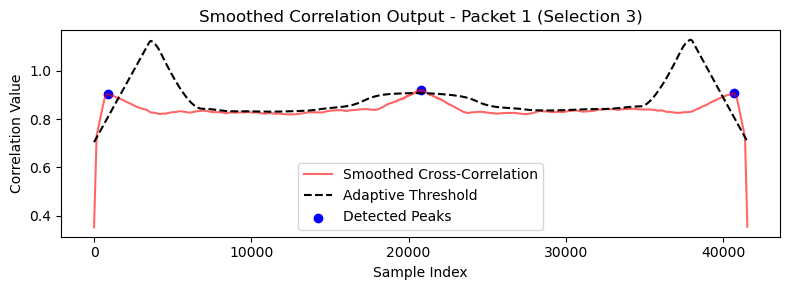

Packet 2 - Patterns Detected: 5


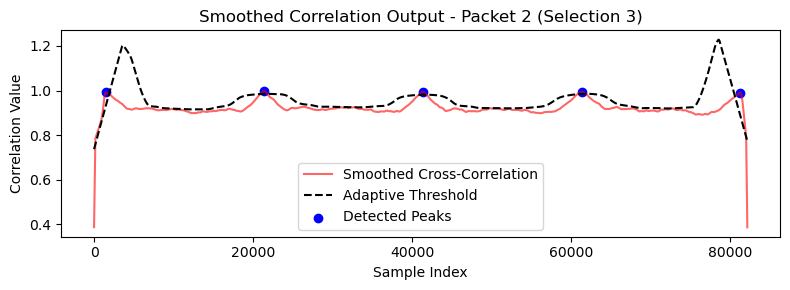

Packet 3 - Patterns Detected: 3


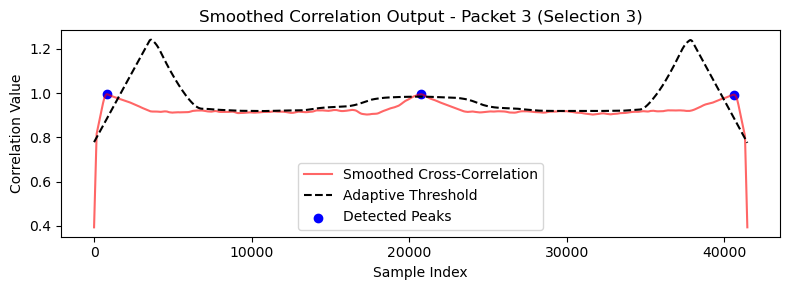

Packet 4 - Patterns Detected: 3


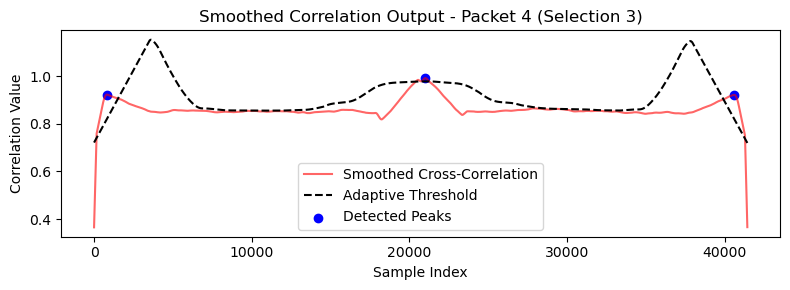

Packet 5 - Patterns Detected: 5


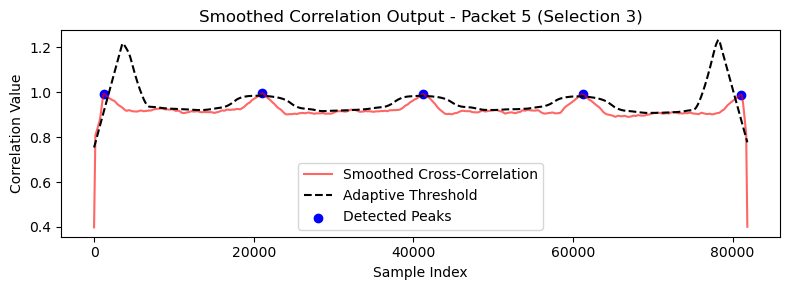

Packet 6 - Patterns Detected: 3


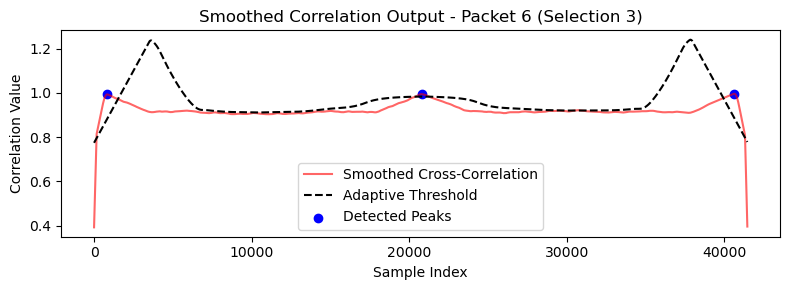

Packet 7 - Patterns Detected: 3


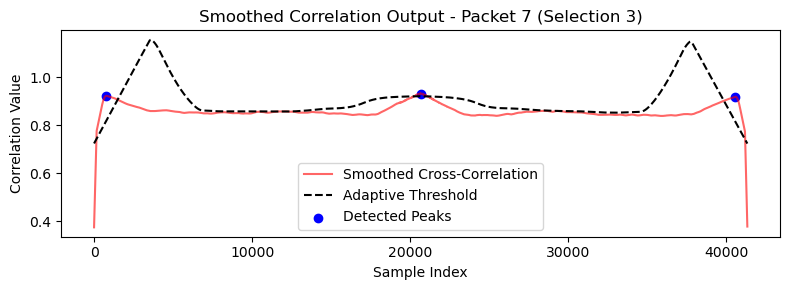

Packet 8 - Patterns Detected: 5


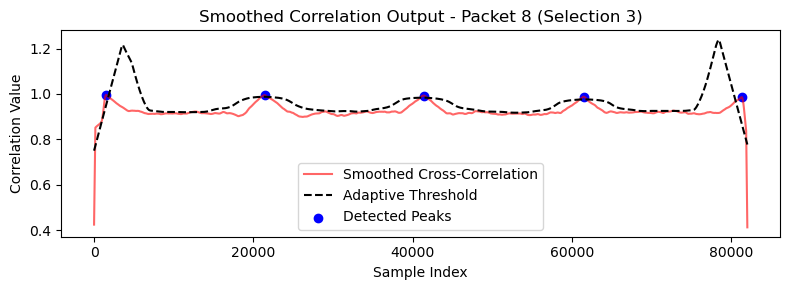

Packet 9 - Patterns Detected: 3


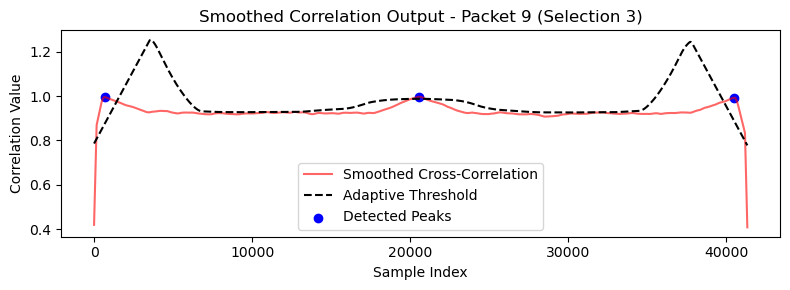

Packet 10 - Patterns Detected: 3


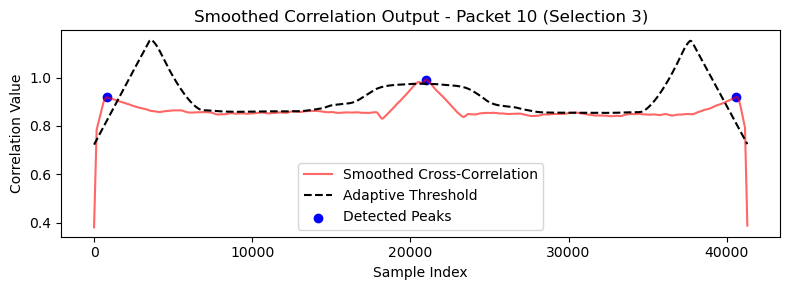

Packet 11 - Patterns Detected: 5


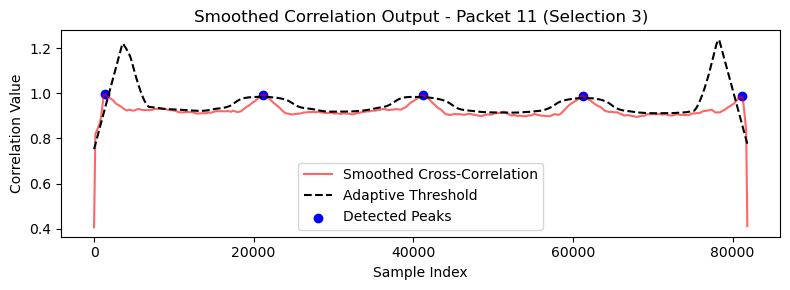

Packet 12 - Patterns Detected: 3


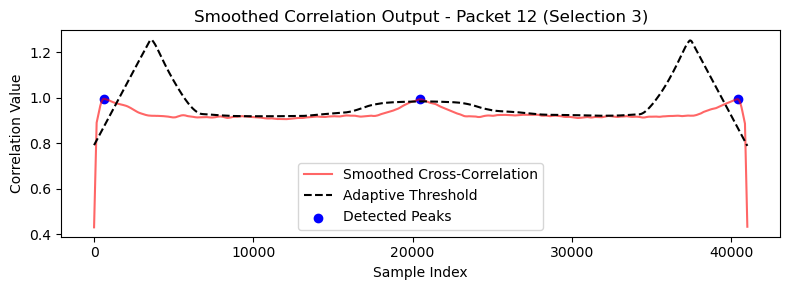

Packet 13 - Patterns Detected: 3


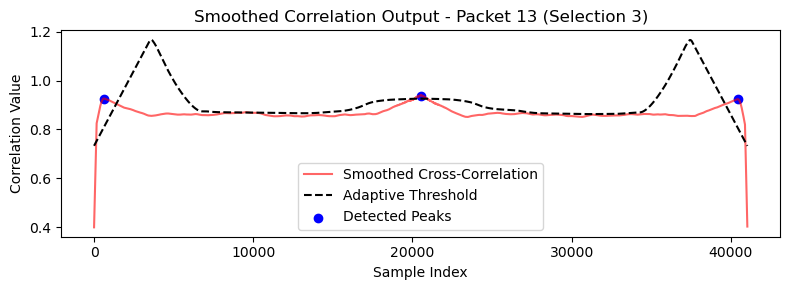

Packet 14 - Patterns Detected: 3


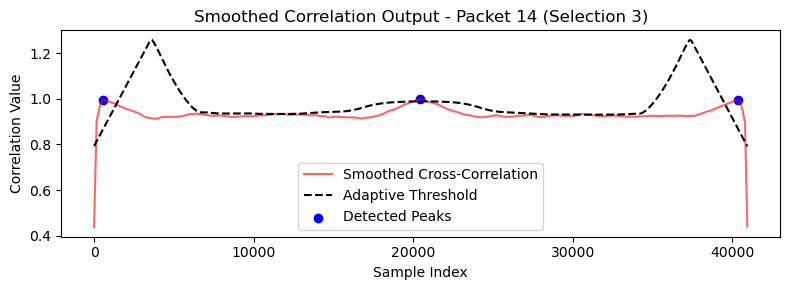

Packet 15 - Patterns Detected: 3


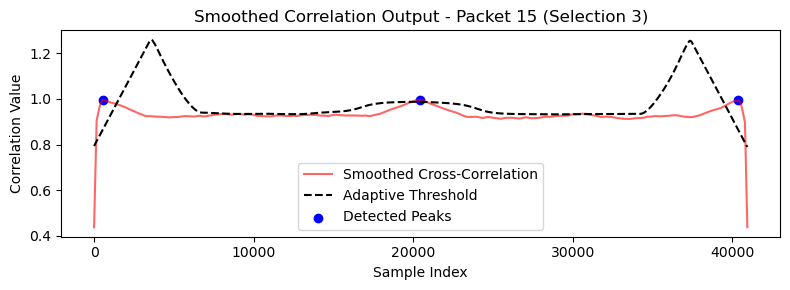

Packet 16 - Patterns Detected: 3


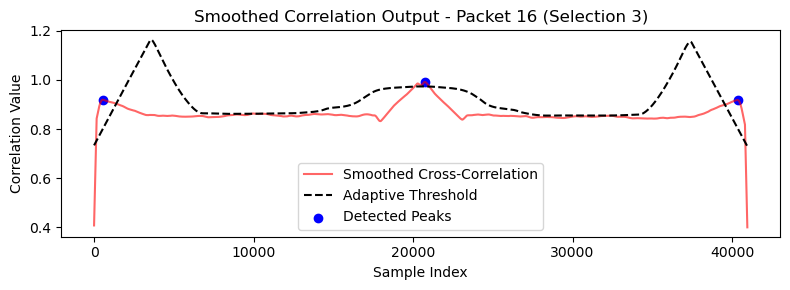

Packet 17 - Patterns Detected: 5


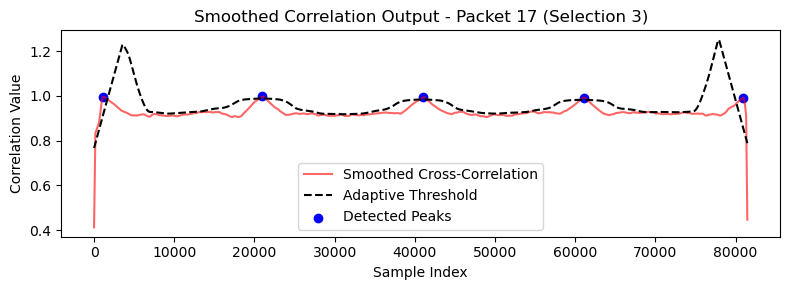

Packet 18 - Patterns Detected: 3


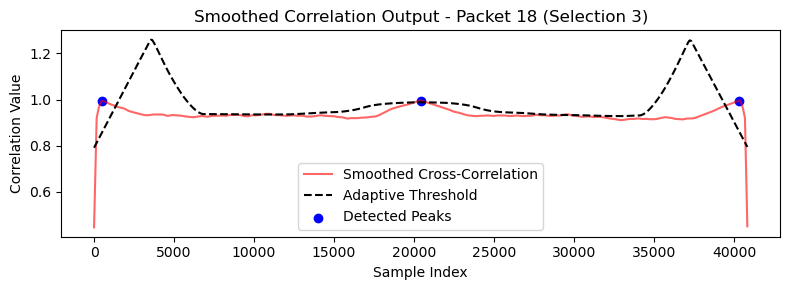

Packet 19 - Patterns Detected: 3


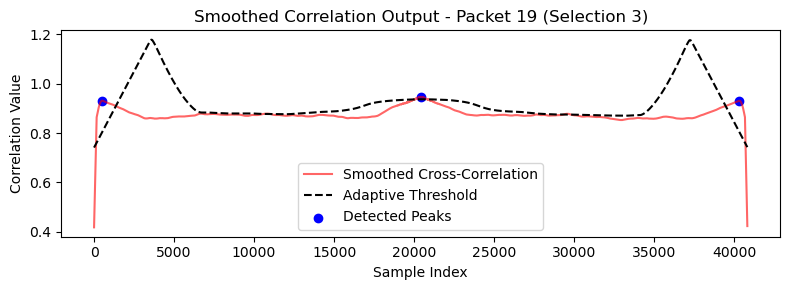

Packet 20 - Patterns Detected: 3


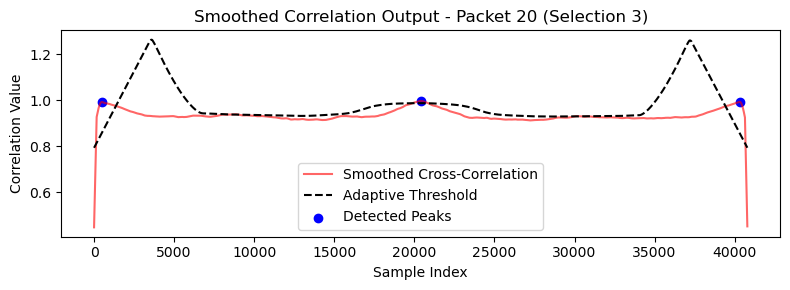

Packet 21 - Patterns Detected: 3


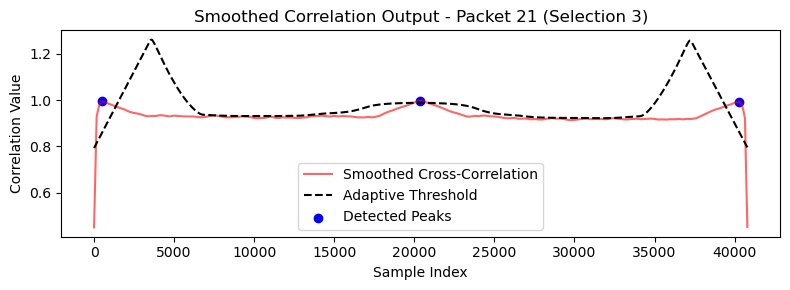

Packet 22 - Patterns Detected: 3


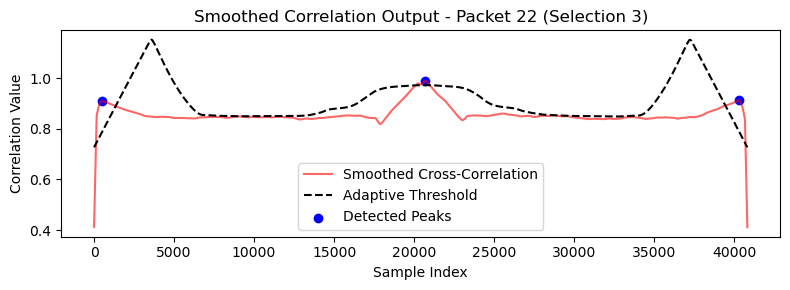

Packet 23 - Patterns Detected: 5


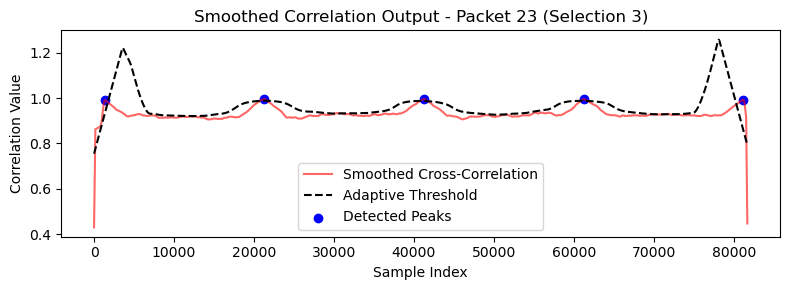

Packet 24 - Patterns Detected: 3


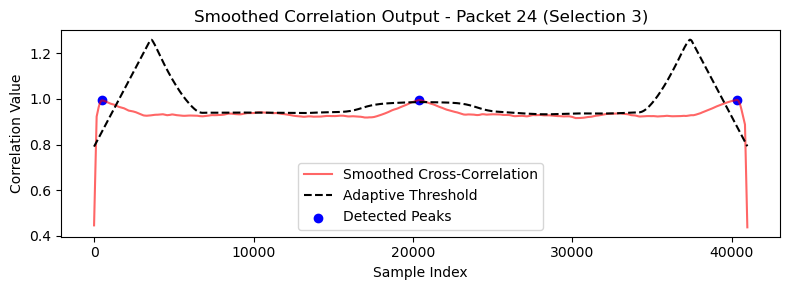

Packet 25 - Patterns Detected: 3


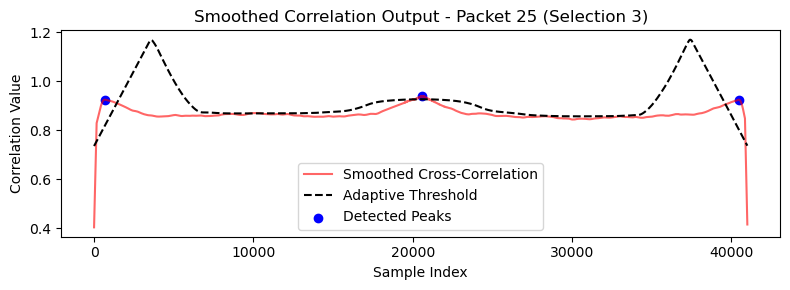

Packet 26 - Patterns Detected: 5


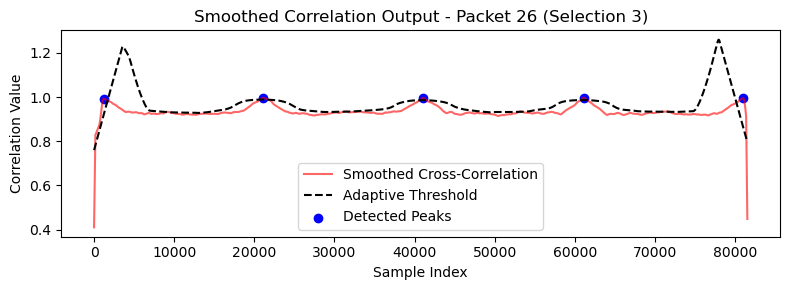

Packet 27 - Patterns Detected: 3


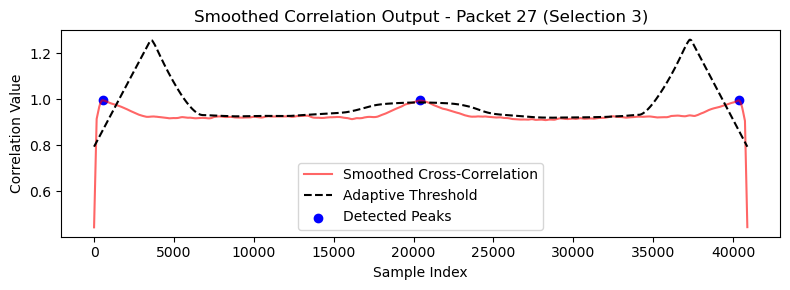

Packet 28 - Patterns Detected: 3


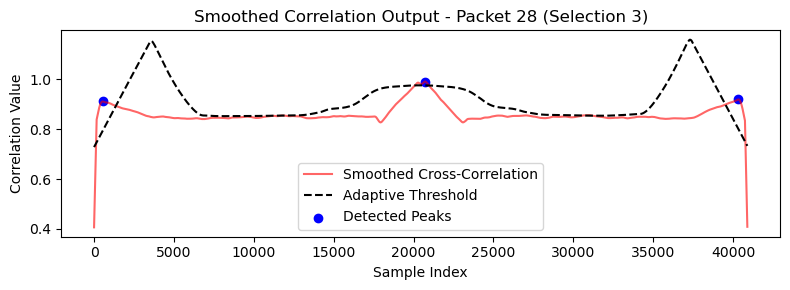

✅ Total Patterns Detected: 98


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Prompt user for selection
selection = input("Press 1, 2, or 3 to select the band: ").strip()
if selection not in ["1", "2", "3"]:
    print("Invalid selection. Defaulting to 1.")
    selection = "1"

# Define known parameters
sampling_rate_mapping = {"1": 40e6, "2": 50e6, "3": 40e6}
sampling_rate = sampling_rate_mapping[selection]
pattern_duration = 70e-6  # 70 microseconds
pattern_length = int(pattern_duration * sampling_rate)  # 2800 samples (for 40 MHz)

# Set the reference start index based on selection
ref_start_idx_mapping = {"1": 20320, "2": 42084, "3": 20700}
ref_start_idx = ref_start_idx_mapping[selection]

# Extract filtered packet list for selected band
reference_packet = filtered_packet_storage[selection]["packets"]

# Get reference pattern from the first filtered packet
reference_pattern = reference_packet[0][ref_start_idx:ref_start_idx + pattern_length]

# Store all extracted patterns
all_extracted_patterns = []

for packet_idx, filtered_packet in enumerate(reference_packet):
    # Matched filter using cross-correlation
    correlation_result = np.correlate(np.abs(filtered_packet), np.abs(reference_pattern), mode="valid")

    # Normalize correlation result
    correlation_result = correlation_result / np.max(correlation_result)

    # Set parameters based on selection
    if selection == "1":
        window_size = 1300
        adaptive_window = 7000
        k_factor = 1.5
        prominence_factor = 0.7
    elif selection == "3":
        window_size = 300
        adaptive_window = 7000
        k_factor = 1.6
        prominence_factor = 0.9
    else:
        window_size = 1800
        adaptive_window = 10000
        k_factor = 1.7
        prominence_factor = 0.7

    # Smooth the correlation result
    smoothed_correlation = signal.convolve(correlation_result, np.ones(window_size) / window_size, mode='same')

    # Compute adaptive threshold
    local_mean = signal.convolve(smoothed_correlation, np.ones(adaptive_window) / adaptive_window, mode='same')
    local_std = np.sqrt(signal.convolve((smoothed_correlation - local_mean) ** 2, np.ones(adaptive_window) / adaptive_window, mode='same'))
    adaptive_threshold = local_mean + k_factor * local_std

    # Detect peaks
    raw_peaks, _ = signal.find_peaks(
        smoothed_correlation,
        height=adaptive_threshold,
        prominence=np.std(smoothed_correlation) * prominence_factor,
        width=100
    )

    # Filter peaks to maintain minimum gap
    min_gap = pattern_length // 2
    filtered_indices = []
    for idx in raw_peaks:
        if not filtered_indices or (idx - filtered_indices[-1]) > min_gap:
            filtered_indices.append(idx)

    detected_indices = np.array(filtered_indices, dtype=int)  # ✅ Fix: convert to int for indexing

    # Extract detected patterns
    extracted_patterns = [filtered_packet[idx:idx + pattern_length] for idx in detected_indices]
    all_extracted_patterns.extend(extracted_patterns)
    # 🔸 Print number of patterns detected in this packet
    print(f"Packet {packet_idx + 1} - Patterns Detected: {len(extracted_patterns)}")

    # Plot correlation and detected peaks
    plt.figure(figsize=(8, 3))
    plt.plot(smoothed_correlation, label="Smoothed Cross-Correlation", color="red", alpha=0.6)
    plt.plot(adaptive_threshold, linestyle="--", color="black", label="Adaptive Threshold")
    plt.scatter(detected_indices, smoothed_correlation[detected_indices], color="blue", marker="o", label="Detected Peaks")
    plt.xlabel("Sample Index")
    plt.ylabel("Correlation Value")
    plt.legend()
    plt.title(f"Smoothed Correlation Output - Packet {packet_idx + 1} (Selection {selection})")
    plt.tight_layout()
    plt.show()

    # Plot each detected pattern's spectrogram
    for i, pattern in enumerate(extracted_patterns):
        '''
        plt.figure(figsize=(10, 4))
        plt.specgram(pattern, NFFT=256, Fs=sampling_rate, noverlap=128, scale='dB')
        plt.title(f"Spectrogram of Extracted Pattern {i + 1} (Packet {packet_idx + 1}, Selection {selection})")
        plt.xlabel("Time [s]")
        plt.ylabel("Frequency [Hz]")
        plt.colorbar(label="Power/Frequency [dB]")
        plt.tight_layout()
        plt.show()
        '''
print(f"✅ Total Patterns Detected: {len(all_extracted_patterns)}")


# Skewnwss, Kurtosis and KDE plot


📊 Total Extracted Patterns: 98

📈 Pattern 1:
   • Skewness: -0.4026 → Negative Skewness
   • Kurtosis: -0.2109 → Platykurtic (Flat peak)

📈 Pattern 2:
   • Skewness: -0.7012 → Negative Skewness
   • Kurtosis: 0.1434 → Leptokurtic (Sharp peak)

📈 Pattern 3:
   • Skewness: -0.4031 → Negative Skewness
   • Kurtosis: -0.2586 → Platykurtic (Flat peak)

📈 Pattern 4:
   • Skewness: -0.3938 → Negative Skewness
   • Kurtosis: -0.2531 → Platykurtic (Flat peak)

📈 Pattern 5:
   • Skewness: -0.3955 → Negative Skewness
   • Kurtosis: -0.2491 → Platykurtic (Flat peak)

📈 Pattern 6:
   • Skewness: -0.4054 → Negative Skewness
   • Kurtosis: -0.2103 → Platykurtic (Flat peak)

📈 Pattern 7:
   • Skewness: -0.4076 → Negative Skewness
   • Kurtosis: -0.1949 → Platykurtic (Flat peak)

📈 Pattern 8:
   • Skewness: -0.3998 → Negative Skewness
   • Kurtosis: -0.2072 → Platykurtic (Flat peak)

📈 Pattern 9:
   • Skewness: -0.3986 → Negative Skewness
   • Kurtosis: -0.2267 → Platykurtic (Flat peak)

📈 Pattern 10:

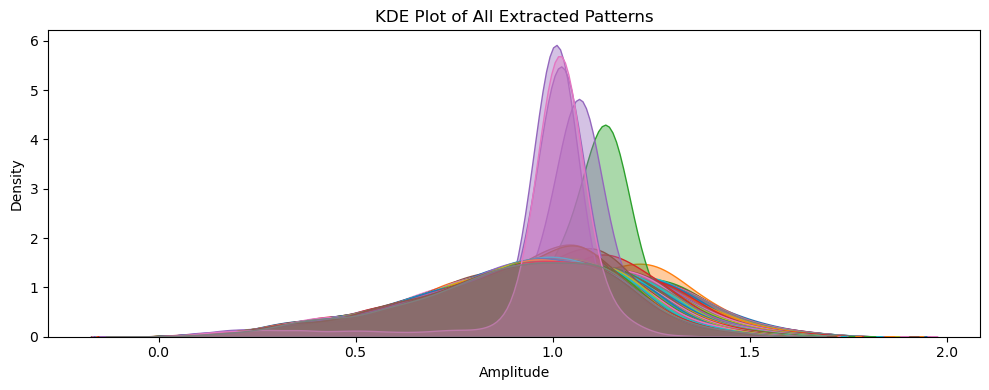

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Statistical Moment Calculations ----------

def moment_based_skew(distribution):
    magnitude = np.abs(distribution)
    n = len(magnitude)
    mean = np.mean(magnitude)
    std = np.std(magnitude)
    return 0 if std == 0 else (n / ((n - 1) * (n - 2))) * np.sum(((magnitude - mean) / std) ** 3)

def moment_based_kurtosis(distribution):
    magnitude = np.abs(distribution)
    n = len(magnitude)
    mean = np.mean(magnitude)
    std = np.std(magnitude)
    return 0 if std == 0 else (1 / n) * np.sum(((magnitude - mean) / std) ** 4) - 3

# ---------- Classification Helpers ----------

def classify_skewness(skew_value):
    if skew_value > 0:
        return "Positive Skewness"
    elif skew_value < 0:
        return "Negative Skewness"
    return "Symmetrical Distribution"

def classify_kurtosis(kurt_value):
    if kurt_value > 0:
        return "Leptokurtic (Sharp peak)"
    elif kurt_value < 0:
        return "Platykurtic (Flat peak)"
    return "Mesokurtic (Normal peak)"

# ---------- Pattern Analysis Core ----------

def analyze_extracted_patterns(all_patterns):
    if not all_patterns:
        print("No patterns to analyze.")
        return

    print(f"\n📊 Total Extracted Patterns: {len(all_patterns)}\n")

    skewness_values = []
    kurtosis_values = []

    for idx, pattern in enumerate(all_patterns, 1):
        skew_val = moment_based_skew(pattern)
        kurt_val = moment_based_kurtosis(pattern)

        skewness_values.append(skew_val)
        kurtosis_values.append(kurt_val)

        print(f"📈 Pattern {idx}:")
        print(f"   • Skewness: {skew_val:.4f} → {classify_skewness(skew_val)}")
        print(f"   • Kurtosis: {kurt_val:.4f} → {classify_kurtosis(kurt_val)}\n")

    # ---------- KDE Plot ----------
    plt.figure(figsize=(10, 4))
    for i, pattern in enumerate(all_patterns):
        sns.kdeplot(np.abs(pattern), fill=True, alpha=0.4, linewidth=1)

    plt.title("KDE Plot of All Extracted Patterns")
    plt.xlabel("Amplitude")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# ---------- Main Execution ----------

if __name__ == "__main__":
    try:
        analyze_extracted_patterns(all_extracted_patterns)
    except NameError:
        print("⚠️ Variable `all_extracted_patterns` not found. Ensure patterns are detected before running this.")
